In [2]:
pip install python-can


Note: you may need to restart the kernel to use updated packages.


VirtualBus was not properly shut down


Enter number of iterations:  20


Starting ABS Simulation using Virtual CAN Bus...
Sent: Wheel Speed=69 km/h, Vehicle Speed=72 km/h, ABS=0
Sent: Wheel Speed=33 km/h, Vehicle Speed=98 km/h, ABS=1
Sent: Wheel Speed=62 km/h, Vehicle Speed=80 km/h, ABS=1
Sent: Wheel Speed=74 km/h, Vehicle Speed=61 km/h, ABS=0
Sent: Wheel Speed=77 km/h, Vehicle Speed=88 km/h, ABS=0
Sent: Wheel Speed=41 km/h, Vehicle Speed=75 km/h, ABS=1
Sent: Wheel Speed=61 km/h, Vehicle Speed=53 km/h, ABS=0
Sent: Wheel Speed=78 km/h, Vehicle Speed=58 km/h, ABS=0
Sent: Wheel Speed=80 km/h, Vehicle Speed=55 km/h, ABS=0
Sent: Wheel Speed=62 km/h, Vehicle Speed=55 km/h, ABS=0
Sent: Wheel Speed=63 km/h, Vehicle Speed=75 km/h, ABS=0
Sent: Wheel Speed=57 km/h, Vehicle Speed=82 km/h, ABS=1
Sent: Wheel Speed=58 km/h, Vehicle Speed=53 km/h, ABS=0
Sent: Wheel Speed=73 km/h, Vehicle Speed=86 km/h, ABS=0
Sent: Wheel Speed=59 km/h, Vehicle Speed=72 km/h, ABS=0
Sent: Wheel Speed=66 km/h, Vehicle Speed=52 km/h, ABS=0
Sent: Wheel Speed=71 km/h, Vehicle Speed=89 km/h, ABS=1

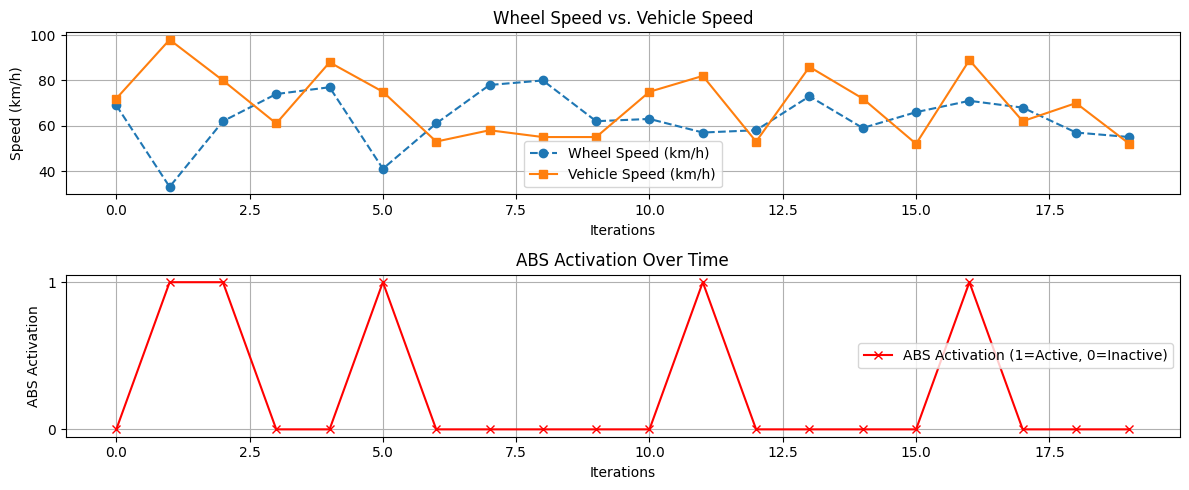

In [13]:
import can
import time
import random
import matplotlib.pyplot as plt

#  Use a virtual CAN Bus (No hardware needed)
try:
    bus = can.Bus(interface="virtual", channel="vcan0", bitrate=500000)  # Linux
except:
    from can.interfaces.virtual import VirtualBus
    bus = VirtualBus()  # For Windows or fallback

#  Function to calculate slip ratio
def calculate_slip_ratio(wheel_speed, vehicle_speed):
    if vehicle_speed == 0:
        return 0  # Avoid division by zero
    return (vehicle_speed - wheel_speed) / vehicle_speed

#  Function to simulate ABS control
def abs_control(num_iterations):
    wheel_speeds = []
    vehicle_speeds = []
    abs_activations = []
    
    for _ in range(num_iterations):
        wheel_speed = random.randint(30, 80)  
        vehicle_speed = random.randint(50, 100)  
        slip_ratio = calculate_slip_ratio(wheel_speed, vehicle_speed)
        braking_force = 1 if slip_ratio > 0.2 else 0

        #  Create a CAN message
        message = can.Message(
            arbitration_id=0x123,
            data=[wheel_speed & 0xFF, vehicle_speed & 0xFF, braking_force, 0, 0, 0, 0, 0],  # 8-byte message
            is_extended_id=False
        )
        bus.send(message)
        print(f"Sent: Wheel Speed={wheel_speed} km/h, Vehicle Speed={vehicle_speed} km/h, ABS={braking_force}")

        # 🔹 Store values for plotting
        wheel_speeds.append(wheel_speed)
        vehicle_speeds.append(vehicle_speed)
        abs_activations.append(braking_force)

        time.sleep(1)  # Simulate real-time

    print("Simulation Completed.")

    #  Plot graphs
    plot_graphs(wheel_speeds, vehicle_speeds, abs_activations)

# Function to plot graphs
def plot_graphs(wheel_speeds, vehicle_speeds, abs_activations):
    iterations = range(len(wheel_speeds))

    plt.figure(figsize=(12, 5))

    #  Plot Wheel Speed & Vehicle Speed
    plt.subplot(2, 1, 1)
    plt.plot(iterations, wheel_speeds, label="Wheel Speed (km/h)", marker="o", linestyle="--")
    plt.plot(iterations, vehicle_speeds, label="Vehicle Speed (km/h)", marker="s", linestyle="-")
    plt.xlabel("Iterations")
    plt.ylabel("Speed (km/h)")
    plt.title("Wheel Speed vs. Vehicle Speed")
    plt.legend()
    plt.grid(True)

    #  Plot ABS Activation
    plt.subplot(2, 1, 2)
    plt.plot(iterations, abs_activations, label="ABS Activation (1=Active, 0=Inactive)", marker="x", linestyle="-", color="r")
    plt.xlabel("Iterations")
    plt.ylabel("ABS Activation")
    plt.title("ABS Activation Over Time")
    plt.yticks([0, 1])
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# 🔹 Run the ABS Simulation
try:
    num_iterations = int(input("Enter number of iterations: "))  # Get user input
    print("Starting ABS Simulation using Virtual CAN Bus...")
    abs_control(num_iterations)
except KeyboardInterrupt:
    print(" Stopping Simulation")
    bus.shutdown()
